# Calcolo dei parametri di una distribuzione di Gumbel con il metodo della massima verosimiglianza

Ricordiamo l'espressione della famiglia parametrica di curve di Gumbel:
$$ P[H<h; a,b] = e^{-e-{\frac{h-a}{b}}}$$

Il metodo della massima verosimiglianza calcola i valori dei parametri per cui  la probabilità congiunta di ottenere una serie di dati $\{h_1, \cdot \cdot, h_n \}$ è massima:
\begin{equation}
{\rm argmax}_{a,b} P[\{h_1, \cdot \cdot, h_n \};a,b] = {\rm argmax}_{a,b} \prod_i^n P[h_i;a,b]
\end{equation}

In [1]:
#from scipy.stats import norm
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
#from pylab import plot,show,hist,figure,title

In [2]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt

os.getcwd()
os.chdir("/Users/riccardo/Dropbox/A-Data/Paperopoli")
#os.chdir("C:\\Users\\riccardo\\Dropbox\\A-Data\\Paperopoli")
data = pd.read_csv('PluviometriaPaperopoli_4.txt')
map(datetime,data['anno'])
data=data.set_index('anno')

In [3]:
data

,1h,3h,6h,12h,24h
anno,,,,,
1925,50.0,NaN,NaN,NaN,NaN
1928,35.0,47.0,50.0,50.4,67.6
1929,35.4,36.4,36.4,49.6,74.0
1930,67.2,68.2,80.8,102.2,106.8
1931,25.2,NaN,NaN,NaN,NaN
1932,35.2,NaN,NaN,NaN,NaN
1934,48.6,NaN,NaN,NaN,NaN
1935,36.4,55.2,81.0,94.4,149.0
1936,47.8,54.2,55.4,55.6,74.6



2
down vote
accepted
All rv_continuous.fit seems to be doing is act as a wrapper method for various functions, beginning with fmin, in the optimize class, using the downhill simplex algorithm.

http://glowingpython.blogspot.it/2012/07/distribution-fitting-with-scipy.html says that the documentation reports that the method uses MLE.   

In [4]:
samp = data["1h"]
param1h = gumbel_r.fit(samp) # distribution fitting
param1h

(31.590419540406916, 9.0731598725627016)

In [5]:
samp = data["3h"].dropna()
param3h = gumbel_r.fit(samp) # distribution fitting
param3h

(39.527315031968776, 10.041455675185944)

In [6]:
samp = data["6h"].dropna()
param6h = gumbel_r.fit(samp) # distribution fitting
param6h

(48.10031586110712, 12.398915217787547)

In [7]:
samp = data["12h"].dropna()
param12h = gumbel_r.fit(samp) # distribution fitting
param12h

(60.562103494138093, 18.005470790743232)

In [8]:
samp = data["24h"].dropna()
param24h = gumbel_r.fit(samp) # distribution fitting
param24h

(75.848890849512259, 22.435147604228796)

In [9]:
abs_mle=pd.DataFrame([param1h,param3h,param6h,param12h,param24h],
                     columns=["a","b"],
                     index=["1h","3h","6h","12h","24h"]).T
abs_mle

,1h,3h,6h,12h,24h
a,31.59042,39.527315,48.100316,60.562103,75.848891
b,9.07316,10.041456,12.398915,18.005471,22.435148


In [10]:
abs_mle.to_pickle("abs_mle")

In [11]:
#df = pd.read_pickle(file_name)

In [11]:
data.min()[0]

19.600000000000001

In [12]:
data.max()[4]

169.40000000000001

In [13]:
#from scipy.stats import genextreme,gumbel_r
#from numpy import linspace
from statsmodels.distributions.empirical_distribution import ECDF
def gumbel(x,abs_d,col):
    return np.exp(-np.exp(-(x-abs_d[col]["a"])/abs_d[col]["b"]))

t_rain=np.linspace(data.min()[0],data.max()[4],100)

In [14]:
gb=pd.DataFrame([gumbel(t_rain,abs_mle,"1h"),
                 gumbel(t_rain,abs_mle,"3h"),
                 gumbel(t_rain,abs_mle,"6h"),
                 gumbel(t_rain,abs_mle,"12h"),
                 gumbel(t_rain,abs_mle,"24h")]).T
gb[:5]

,0,1,2,3,4
0,0.023538,0.000692,0.000047,0.000060,0.000005
1,0.041867,0.001916,0.000148,0.000131,0.000010
2,0.068165,0.004597,0.000408,0.000268,0.000022
3,0.102976,0.009760,0.001001,0.000521,0.000044
4,0.146011,0.018651,0.002213,0.000958,0.000085


In [15]:
gb=pd.DataFrame([gumbel(t_rain,abs_mle,"1h"),
                 gumbel(t_rain,abs_mle,"3h"),
                 gumbel(t_rain,abs_mle,"6h"),
                 gumbel(t_rain,abs_mle,"12h"),
                 gumbel(t_rain,abs_mle,"24h")]).T
gb.index=t_rain
gb.columns=["1h","3h","6h","12h","24h"]
gb[5:]

,1h,3h,6h,12h,24h
19.600000,0.023538,0.000692,0.000047,0.000060,0.000005
21.113131,0.041867,0.001916,0.000148,0.000131,0.000010
22.626263,0.068165,0.004597,0.000408,0.000268,0.000022
24.139394,0.102976,0.009760,0.001001,0.000521,0.000044
25.652525,0.146011,0.018651,0.002213,0.000958,0.000085
27.165657,0.196218,0.032554,0.004467,0.001678,0.000157
28.678788,0.251987,0.052561,0.008318,0.002808,0.000278
30.191919,0.311409,0.079364,0.014421,0.004509,0.000475
31.705051,0.372527,0.113122,0.023469,0.006969,0.000782
33.218182,0.433541,0.153441,0.036115,0.010399,0.001247


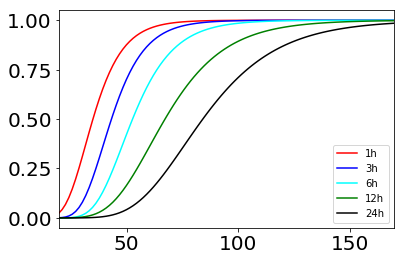

In [16]:
plt.rc('xtick', labelsize=20) #Quest  comandi globali
plt.rc('ytick', labelsize=20) #Questi sono comandi globali
ax=gb.plot(color=["red","blue","cyan","green","black"])

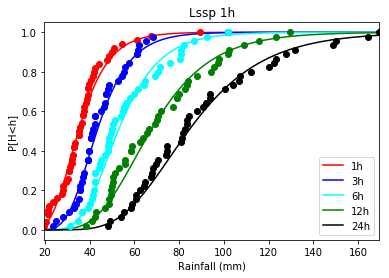

In [19]:
plt.rc('xtick', labelsize=10) #Quest  comandi globali
plt.rc('ytick', labelsize=10) #Questi sono comandi globali
ax=gb.plot(color=["red","blue","cyan","green","black"])
ecdf1h = ECDF(data["1h"])
ax.plot(data["1h"],ecdf1h(data["1h"]),'o',c="red")
data3h=data["3h"].dropna()
ecdf3h = ECDF(data3h)
ax.plot(data3h,ecdf3h(data3h),"o",c="blue")
data6h=data["6h"].dropna()
ecdf6h = ECDF(data6h)
ax.plot(data6h,ecdf6h(data6h),"o",c="cyan")
data12h=data["12h"].dropna()
ecdf12h = ECDF(data12h)
ax.plot(data12h,ecdf12h(data12h),"o",c="green")
data24h=data["24h"].dropna()
ecdf24h = ECDF(data24h)
ax.plot(data24h,ecdf24h(data24h),"o",c="black")
ax.set_title('Lssp 1h')
ax.set_xlabel('Rainfall (mm)')
ax.set_ylabel('P[H<h]')